In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/4thyear/Datamining'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/4thyear/Datamining


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

# **Preprocessing of data**

In [4]:
#Load data set
data = pd.read_csv("Wholesale customers data.csv")
data.shape

(440, 8)

In [5]:
# Drop the nominal columns
del data['Region']
del data['Channel']
data.shape

(440, 6)

In [6]:
#remove zeroes rows to avoid error in log(0)
data = data[~(data == 0).any(axis=1)]
data.shape

(440, 6)

In [7]:
#Normalize data using log
data = data.apply(np.log)
print(data)

         Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicassen
0     9.446913  9.175335   8.930759  5.365976          7.891331    7.198931
1     8.861775  9.191158   9.166179  7.474205          8.099554    7.482119
2     8.756682  9.083416   8.946896  7.785305          8.165079    8.967504
3     9.492884  7.086738   8.347827  8.764678          6.228511    7.488853
4    10.026369  8.596004   8.881558  8.272571          7.482682    8.553525
..         ...       ...        ...       ...               ...         ...
435  10.299003  9.396903   9.682030  9.483036          5.204007    7.698029
436  10.577146  7.266129   6.638568  8.414052          4.532599    7.760467
437   9.584040  9.647821  10.317020  6.079933          9.605149    7.532088
438   9.238928  7.591357   7.710653  6.945051          5.123964    7.661527
439   7.932721  7.437206   7.828038  4.174387          6.167516    3.951244

[440 rows x 6 columns]


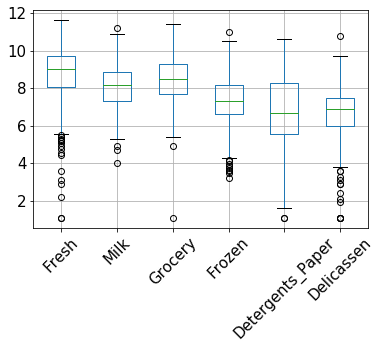

In [8]:
#check if there are outliers
boxplot = data.boxplot(grid=True, rot=45, fontsize=15)

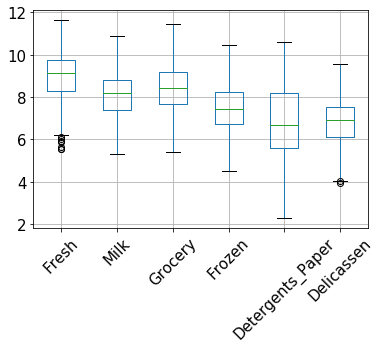

In [10]:
#Remove outliers
prev_cols = 0
for column in data:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  filter = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 *IQR)
  data = data.loc[filter]
boxplot = data.boxplot(grid=True, rot=45, fontsize=15)

In [24]:
#Apply PCA
pca = PCA(n_components=2)
pca.fit(data)
data = pd.DataFrame(pca.transform(data))
data.shape

(394, 2)

## **Kmean Clustering**

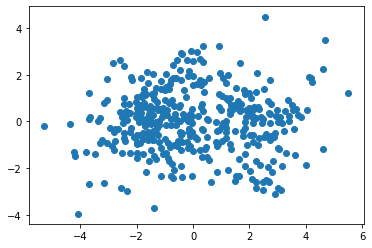

In [12]:
#Convert dataframe to 2d array then scatter plot
data_array = data.to_numpy()
plt.scatter(data_array[:,0], data_array[:,1])

In [13]:
#Find best number of clusters using silhouette coeff.
range_n_clusters = np.zeros(101)
for i in range(2, 101):
  clusterer = KMeans (n_clusters=i)
  preds = clusterer.fit_predict(data_array)
  centers = clusterer.cluster_centers_
  score = silhouette_score (data_array, preds, metric='euclidean')
  range_n_clusters[i] = score

best_n_clusters = np.argmax(range_n_clusters)
print(best_n_clusters)

2


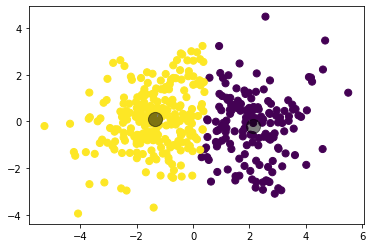

In [14]:
#Apply the best culster n found and plot the clusters
clusterer = KMeans (n_clusters=2)
preds = clusterer.fit_predict(data_array)
centers = clusterer.cluster_centers_

plt.scatter(data_array[:, 0], data_array[:, 1], c=preds, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
#Evaluate the clustering using Kmean with k = 2
print(range_n_clusters[2])

0.4537671853858155


# **Agglomerative Clustering**

In [17]:
#Find best number of clusters using silhouette coeff.
range_n_clusters = np.zeros(100)
for i in range(2, 100):
  clusterer = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=i)
  preds = clusterer.fit_predict(data_array)
  score = silhouette_score (data_array, preds, metric='euclidean')
  range_n_clusters[i] = score

best_n_clusters = np.argmax(range_n_clusters)
print(best_n_clusters)

53


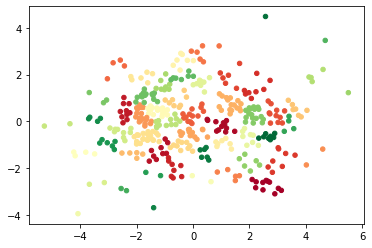

In [18]:
#Apply the best culster n found and plot the clusters
clusterer = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=best_n_clusters)
preds = clusterer.fit_predict(data_array)
 
plt.scatter(data_array[:, 0], data_array[:, 1], c=preds, s=20, cmap='RdYlGn')

In [20]:
print(range_n_clusters[53])

0.3733956341201306


In [0]:
#Find best number of clusters using silhouette coeff.
range_n_clusters = np.zeros(100)
for i in range(2, 100):
  clusterer = AgglomerativeClustering(linkage='average', n_clusters=i)
  preds = clusterer.fit_predict(data_array)
  score = silhouette_score (data_array, preds, metric='euclidean')
  range_n_clusters[i] = score

best_n_clusters = np.argmax(range_n_clusters)

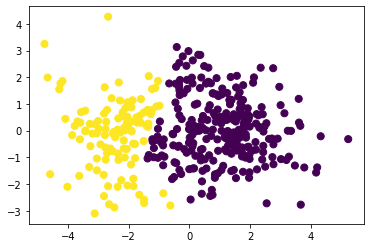

In [0]:
#Apply the best culster n found and plot the clusters
clusterer = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=best_n_clusters)
preds = clusterer.fit_predict(data_array)

plt.scatter(data_array[:, 0], data_array[:, 1], c=preds, s=50, cmap='viridis')

In [0]:
print(range_n_clusters[2])

0.4367651290505603
